### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/drugLibTrain_raw.tsv", sep = "\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [3]:
df = df.drop(columns=["urlDrugName", "condition", "benefitsReview", "sideEffectsReview", "commentsReview"])

In [4]:
df.describe(include= "all")

,rating,effectiveness,sideEffects
count,3107.000000,3107,3107
unique,NaN,5,5
top,NaN,Highly Effective,Mild Side Effects
freq,NaN,1330,1019
mean,7.006115,NaN,NaN
std,2.937582,NaN,NaN
min,1.000000,NaN,NaN
25%,5.000000,NaN,NaN
50%,8.000000,NaN,NaN
75%,9.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 97.1+ KB


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [6]:
df["effectiveness"].value_counts()

effectiveness
Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: count, dtype: int64

In [7]:
df["sideEffects"].value_counts()

sideEffects
Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: count, dtype: int64

In [8]:
df = pd.get_dummies(df, columns = ["effectiveness"])

In [9]:
df = pd.get_dummies(df, columns = ["sideEffects"])

In [10]:
df.head()

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,False,True,False,False,False,False,True,False,False,False
3117,1,False,True,False,False,False,False,False,False,False,True
1146,10,False,True,False,False,False,False,False,False,True,False
3947,3,False,False,False,True,False,False,True,False,False,False
1951,2,False,False,False,True,False,False,False,False,False,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   rating                                     3107 non-null   int64
 1   effectiveness_Considerably Effective       3107 non-null   bool 
 2   effectiveness_Highly Effective             3107 non-null   bool 
 3   effectiveness_Ineffective                  3107 non-null   bool 
 4   effectiveness_Marginally Effective         3107 non-null   bool 
 5   effectiveness_Moderately Effective         3107 non-null   bool 
 6   sideEffects_Extremely Severe Side Effects  3107 non-null   bool 
 7   sideEffects_Mild Side Effects              3107 non-null   bool 
 8   sideEffects_Moderate Side Effects          3107 non-null   bool 
 9   sideEffects_No Side Effects                3107 non-null   bool 
 10  sideEffects_Severe Side Effects            3107 no

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [12]:
X = df

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [14]:
modelo = KMeans(n_init=10)
modelo.fit(X)
pred = modelo.predict(X)


In [15]:
score = metrics.silhouette_score(X, pred)

In [16]:
score

np.float64(0.3936883517128795)

In [63]:
X

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,False,True,False,False,False,False,True,False,False,False
3117,1,False,True,False,False,False,False,False,False,False,True
1146,10,False,True,False,False,False,False,False,False,True,False
3947,3,False,False,False,True,False,False,True,False,False,False
1951,2,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1039,10,False,True,False,False,False,False,True,False,False,False
3281,1,False,False,True,False,False,True,False,False,False,False
1664,2,False,False,False,True,False,False,False,True,False,False
2621,8,True,False,False,False,False,False,True,False,False,False


In [25]:
n = range(2, 30)
lista_sc = []
lista_inercias = []
for i in n:
    modelo = KMeans(n_clusters=i)
    modelo.fit(X)
    pred = modelo.predict(X)
    score = metrics.silhouette_score(X, pred)
    lista_sc.append(score)
    lista_inercias.append(modelo.inertia_)


Text(0, 0.5, 'score')

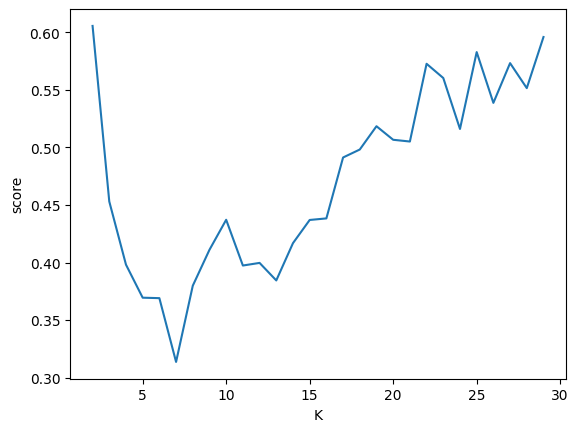

In [26]:
plt.plot(n, lista_sc)
plt.xlabel("K")
plt.ylabel("score")

Text(0, 0.5, 'Inercia')

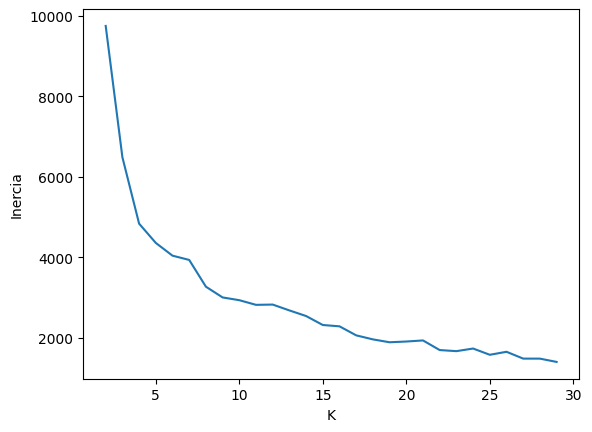

In [27]:
plt.plot(n, lista_inercias)
plt.xlabel("K")
plt.ylabel("Inercia")

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_s = sc.fit_transform(X)

In [34]:
n = range(2, 30)
lista_sc = []
lista_inercias = []
for i in n:
    modelo = KMeans(n_clusters=i)
    modelo.fit(X_s)
    pred = modelo.predict(X_s)
    score = metrics.silhouette_score(X_s, pred)
    lista_sc.append(score)
    lista_inercias.append(modelo.inertia_)


Text(0, 0.5, 'score')

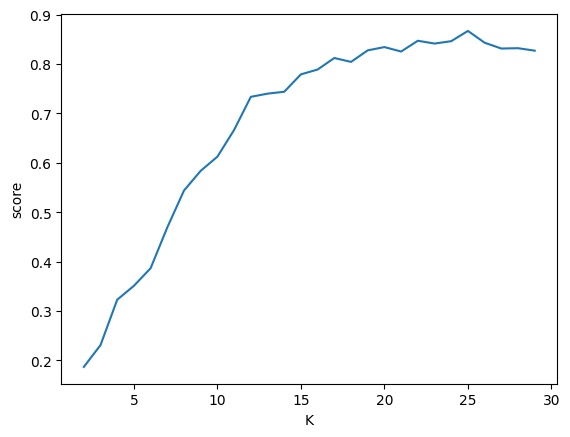

In [35]:
plt.plot(n, lista_sc)
plt.xlabel("K")
plt.ylabel("score")

Text(0, 0.5, 'Inercia')

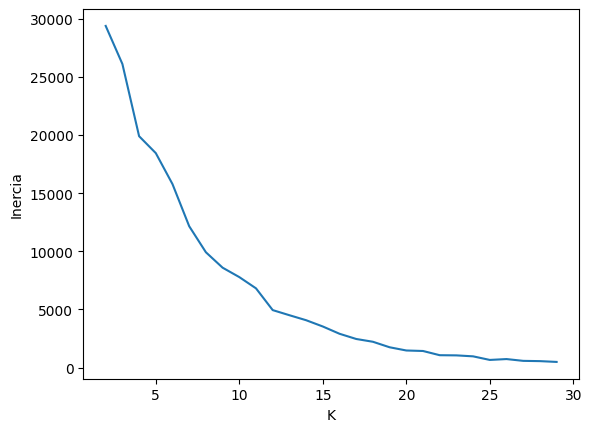

In [36]:
plt.plot(n, lista_inercias)
plt.xlabel("K")
plt.ylabel("Inercia")

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [39]:
modelo = KMeans(n_clusters=2)
modelo.fit(X)
modelo.labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [40]:
df["cluster"] = modelo.labels_
df

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects,cluster
2202,4,False,True,False,False,False,False,True,False,False,False,0
3117,1,False,True,False,False,False,False,False,False,False,True,0
1146,10,False,True,False,False,False,False,False,False,True,False,1
3947,3,False,False,False,True,False,False,True,False,False,False,0
1951,2,False,False,False,True,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,10,False,True,False,False,False,False,True,False,False,False,1
3281,1,False,False,True,False,False,True,False,False,False,False,0
1664,2,False,False,False,True,False,False,False,True,False,False,0
2621,8,True,False,False,False,False,False,True,False,False,False,1


<Axes: ylabel='count'>

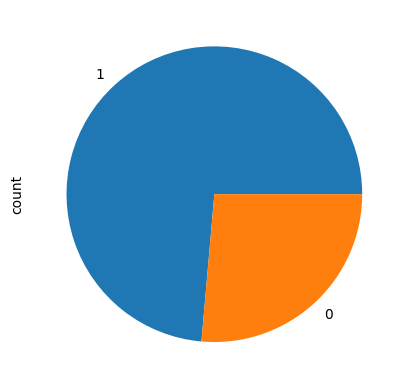

In [43]:
df["cluster"].value_counts().plot.pie()